In [1]:
from aux_train import *
from aux_plot import *
import API_Numpy
import API_TensorFlow

float_pres = 'float64' # Definindo a precisão padrão para as análises

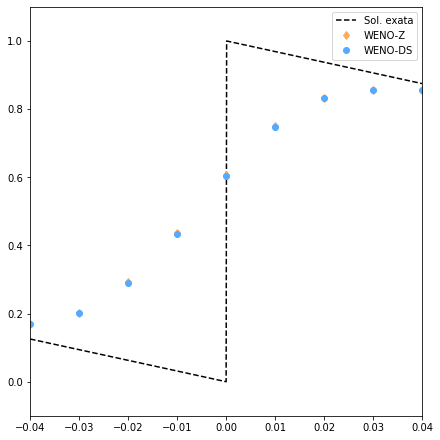

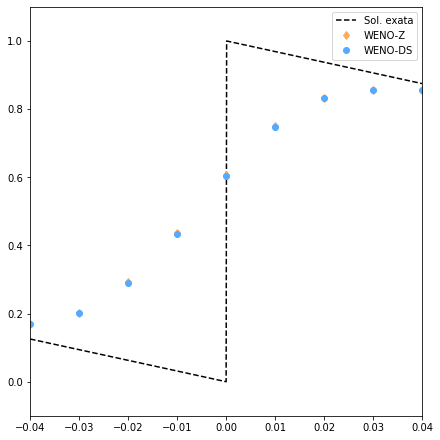

In [2]:
equation=transp_equation
Sim_Z=simulation(API_Numpy,equation,WENO_Z)
Sim_JS=simulation(API_Numpy,equation,WENO_JS)
Sim_DS=load_model('Modelos treinados/Modelo Rede temporal sequencial 1',equation=equation,WENO_method=WENO_Z)

def f_exata(u, t_final, Δx, CFL, fronteira):
    n=np.squeeze(t_final/Δx)
    n_bottom=n//1
    p=n%1
    n_val=np.random.binomial(1,p)
    n=int(n_bottom+n_val)
    n_max=u.shape[-1]
    n=n%n_max
    if n>0:
        u=fronteira(u,API_Numpy,n)[...,:-2*n] 
    return u

evolve_plot=compara_evolve(WENOs=[f_exata,Sim_Z.Sim,Sim_DS.Sim],
                           Δx=0.01,
                           malha=[100,1,1],
                           names=['Sol. exata','WENO-Z','WENO-DS'],
                           use_cache=[True,True,False],
                           replace=False,
                           f_test=f_test_1,
                           fronteira=FronteiraPeriodica,
                           x_range=(-1,1),
                           xlim=(-0.04,0.04),
                           ylim=(-0.1, 1.1),
                           colors=['black','#ffaa55', '#55aaff'],
                           shapes=['--','d','o'])

evolve_plot.gif_framework(int(2/0.01),0.01,'imagens/transp-ds zoomed')

In [3]:
equation=burgers_equation
Sim_Z=simulation(API_Numpy,equation,WENO_Z)
Sim_JS=simulation(API_Numpy,equation,WENO_JS)
#Sim_DS=load_model('Modelos treinados/Modelo Rede temporal conv3 - 1',equation=equation,WENO_method=WENO_Z)
Sim_DS=Sim_Z

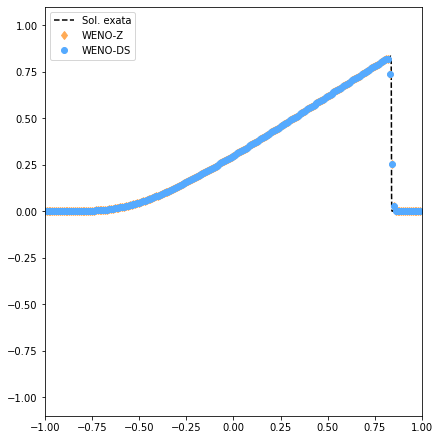

In [4]:
evolve_plot1=compara_evolve(WENOs=[Sim_Z.Sim,Sim_Z.Sim,Sim_DS.Sim],
                           Δx=0.01,
                           malha=[10,1,1],
                           names=['Sol. exata','WENO-Z','WENO-DS'],
                           f_test=f_test_2,
                           fronteira=FronteiraPeriodica,
                           xlim=(-1,1),
                           ylim=(-0.1, 1.1),
                           colors=['black','#ffaa55', '#55aaff'],
                           shapes=['--','d','o'])

evolve_plot1.gif_framework(int(2/0.01),0.01,'imagens/burgers-ds 2')

In [ ]:
evolve_plot2=compara_evolve(WENOs=[Sim_Z.Sim_step,Sim_Z.Sim_step,Sim_DS.Sim_step],
                           Δx=0.01,
                           malha=[10,1,1],
                           names=['Sol. exata','WENO-Z','WENO-DS'],
                           f_test=f_test_2,
                           fronteira=FronteiraPeriodica,
                           xlim=(0.4,0.6),
                           ylim=(-0.1, 1.1),
                           colors=['black','#ffaa55', '#55aaff'],
                           shapes=['--','d','o'])

evolve_plot2.gif_framework(int(2/0.01),0.01,'imagens/burgers-ds 2')

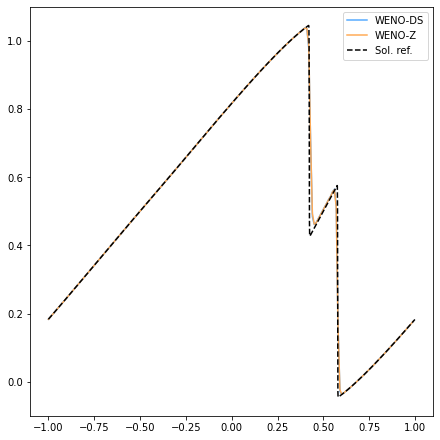

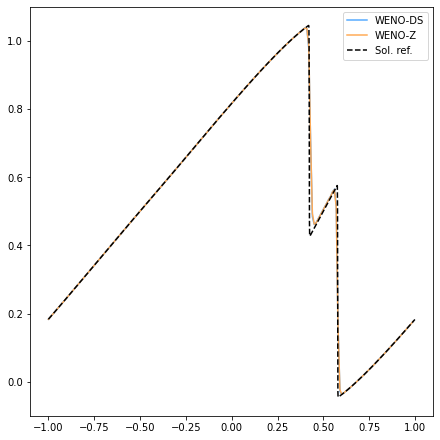

In [ ]:
evolve_plot3=compara_evolve(WENOs=[Sim_Z.Sim_step,Sim_Z.Sim_step,Sim_DS.Sim_step],
                           Δx=0.01,
                           malha=[10,1,1],
                           names=['Sol. exata','WENO-Z','WENO-DS'],
                           f_test=f_test_1,
                           fronteira=FronteiraPeriodica,
                           xlim=(-1,1),
                           ylim=(-0.1, 1.1),
                           colors=['black','#ffaa55', '#55aaff'],
                           shapes=['--','d','o'])

evolve_plot3.gif_framework(int(2/0.01),0.01,'imagens/burgers-ds 1')

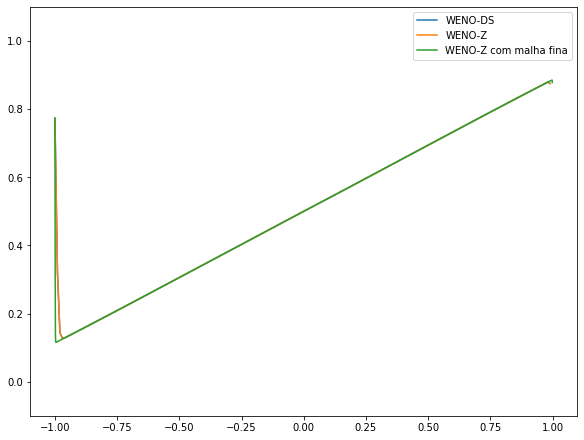

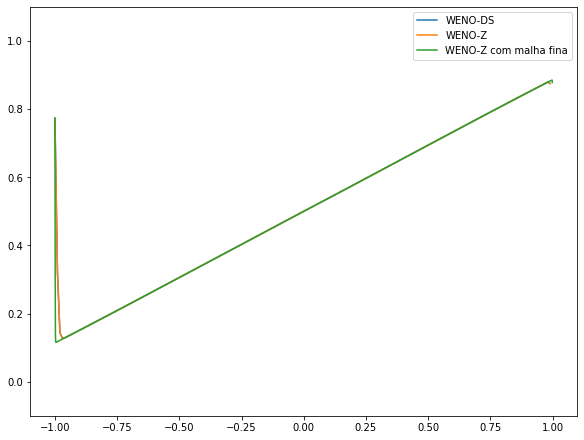

In [ ]:
evolve_plot4=compara_evolve(WENOs=[Sim_Z.Sim_step,Sim_Z.Sim_step,Sim_DS.Sim_step],
                           Δx=0.01,
                           malha=[10,1,1],
                           names=['Sol. exata','WENO-Z','WENO-DS'],
                           f_test=f_test_2,
                           fronteira=FronteiraPeriodica,
                           xlim=(-1,1),
                           ylim=(-0.1, 1.1),
                           colors=['black','#ffaa55', '#55aaff'],
                           shapes=['--','d','o'])

evolve_plot4.gif_framework(int(2/0.01),0.01,'imagens/burgers-ds 2 satur')